<img src="https://i.ytimg.com/vi/j5CEi2SO3v4/hqdefault.jpg" alt="Loan Prediction Dataset Using Machine Learning With Data Analysis - YouTube" class=" nofocus" tabindex="0" aria-label="Loan Prediction Dataset Using Machine Learning With Data Analysis - YouTube" role="button" data-bm="2">

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
test = pd.read_csv(r"C:\Users\ajcho\OneDrive\Desktop\full stack data science and AI\BY SELF\Projects\Loan predection\test_data.csv")
train = pd.read_csv(r"C:\Users\ajcho\OneDrive\Desktop\full stack data science and AI\BY SELF\Projects\Loan predection\train_data.csv")


In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
print(f"Train Data Shape: {train.shape}")
print(f"Test Data Shape: {test.shape}")

Train Data Shape: (614, 13)
Test Data Shape: (367, 12)


In [7]:
missing_values = train.isnull().sum()
missing_values[missing_values > 0]

Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64

In [25]:
from sklearn.impute import SimpleImputer

# Drop 'Loan_Status' from training before fitting imputer
train_impute = train.drop(columns=['Loan_Status'], errors='ignore')  # Ignore error if already missing

# Create the imputer
imputer = SimpleImputer(strategy="most_frequent")

# Fit the imputer only on train (without 'Loan_Status') and transform both datasets
train_impute.iloc[:, :] = imputer.fit_transform(train_impute)
test.iloc[:, :] = imputer.transform(test)

# Add 'Loan_Status' back to train after imputation
train_impute['Loan_Status'] = train['Loan_Status']  # Restore Loan_Status after imputation

# Assign the cleaned dataset back
train = train_impute

print("Imputation successful!")


Imputation successful!


In [27]:
train.isnull().sum().sum()  # Should return 0

np.int64(0)

In [29]:
cat_cols = train.select_dtypes(include=['object']).columns
print("Categorical Columns:", cat_cols)

for col in cat_cols:
    print(f"\nUnique values in {col}:\n", train[col].value_counts())

Categorical Columns: Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

Unique values in Loan_ID:
 Loan_ID
LP002990    1
LP001002    1
LP001003    1
LP001005    1
LP001006    1
           ..
LP001020    1
LP001024    1
LP001027    1
LP001028    1
LP001029    1
Name: count, Length: 614, dtype: int64

Unique values in Gender:
 Gender
Male      502
Female    112
Name: count, dtype: int64

Unique values in Married:
 Married
Yes    401
No     213
Name: count, dtype: int64

Unique values in Dependents:
 Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

Unique values in Education:
 Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

Unique values in Self_Employed:
 Self_Employed
No     532
Yes     82
Name: count, dtype: int64

Unique values in Property_Area:
 Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int6

C:\Users\ajcho\AppData\Local\Temp\ipykernel_8880\2140296028.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train[col], palette="coolwarm")
C:\Users\ajcho\AppData\Local\Temp\ipykernel_8880\2140296028.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train[col], palette="coolwarm")
C:\Users\ajcho\AppData\Local\Temp\ipykernel_8880\2140296028.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train[col], palette="coolwarm")
C:\Users\ajcho\AppData\Local\Temp\ipykernel_8880\2140296028.py:14: FutureWarning: 

Passing `palette

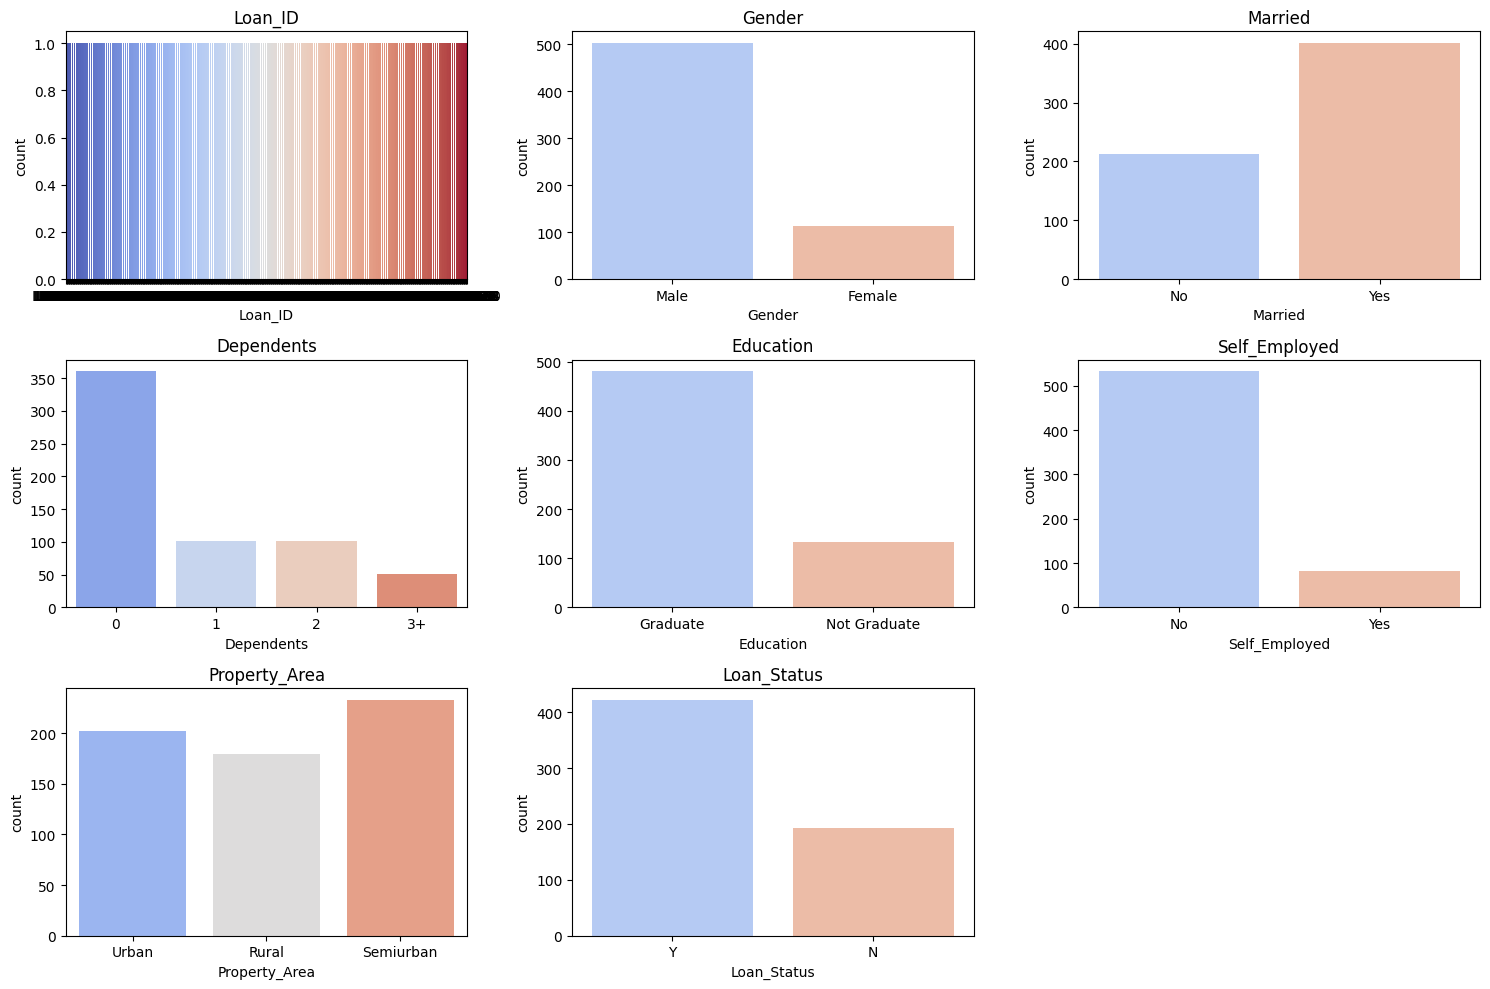

In [31]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

# Dynamically determine rows and columns
num_plots = len(cat_cols)
rows = math.ceil(num_plots / 3)  # Adjust rows based on total plots
cols = min(3, num_plots)  # Max 3 columns

for i, col in enumerate(cat_cols, 1):
    plt.subplot(rows, cols, i)  # Adjust grid size dynamically
    sns.countplot(x=train[col], palette="coolwarm")
    plt.title(col)

plt.tight_layout()
plt.show()


In [33]:
num_cols = train.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:", num_cols)
train[num_cols].describe().T

Numerical Columns: Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,145.465798,84.180967,9.0,100.25,125.0,164.75,700.0
Loan_Amount_Term,614.0,342.410423,64.428629,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.855049,0.352339,0.0,1.00,1.0,1.00,1.0


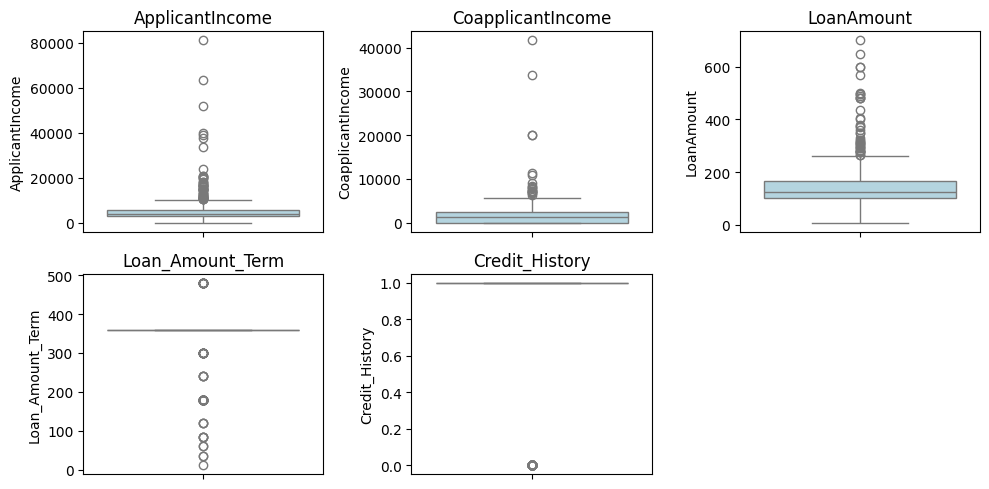

In [35]:
plt.figure(figsize=(10,5))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=train[col], color="lightblue")
    plt.title(col)
plt.tight_layout()
plt.show()

In [37]:
for col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
    train[col] = np.where(train[col] > train[col].quantile(0.99), train[col].quantile(0.99), train[col])

In [39]:
summary_stats = train[num_cols].agg(['mean', 'median', 'std'])
print(summary_stats)

        ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
mean        5209.602394        1483.654967  144.415456        342.410423   
median      3812.500000        1188.500000  125.000000        360.000000   
std         4533.747664        1831.226927   78.720659         64.428629   

        Credit_History  
mean          0.855049  
median        1.000000  
std           0.352339  


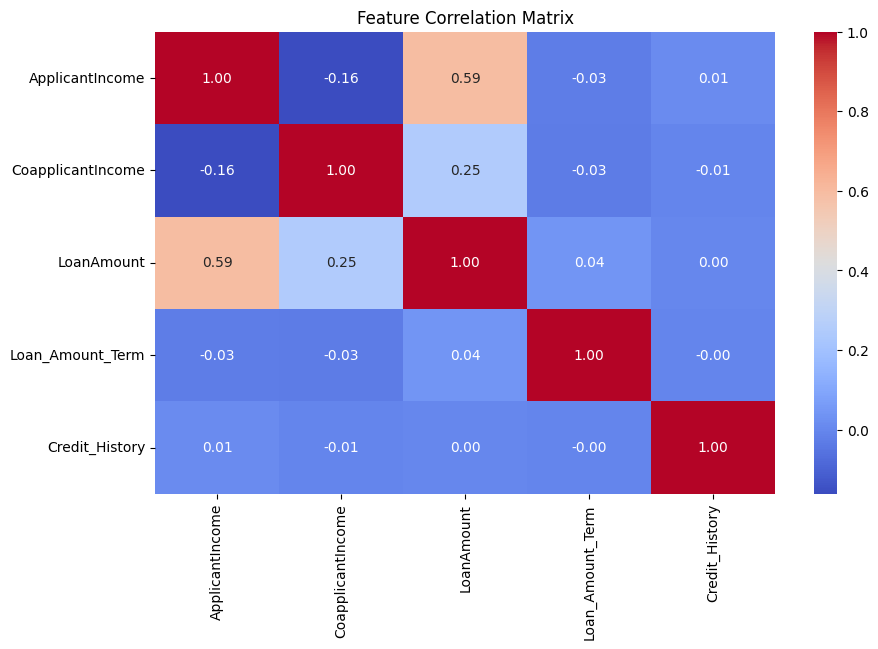

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_data = train.select_dtypes(include=['int64', 'float64'])

# Plot the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


In [43]:
train['Income_Loan_Ratio'] = train['LoanAmount'] / (train['ApplicantIncome'] + train['CoapplicantIncome'] + 1)
test['Income_Loan_Ratio'] = test['LoanAmount'] / (test['ApplicantIncome'] + test['CoapplicantIncome'] + 1)

In [47]:
from sklearn.preprocessing import OrdinalEncoder

# Initialize encoder
encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

# Fit on train data & transform both train and test
train[cat_cols] = encoder.fit_transform(train[cat_cols])
#test[cat_cols] = encoder.transform(test[cat_cols])  # Avoids unseen category errors

print("Categorical columns encoded successfully!")


Categorical columns encoded successfully!


In [49]:
print(train.head())  # See first few rows
print(train.info())  # Check data types and missing values

   Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0      0.0     1.0      0.0         0.0        0.0            0.0   
1      1.0     1.0      1.0         1.0        0.0            0.0   
2      2.0     1.0      1.0         0.0        0.0            1.0   
3      3.0     1.0      1.0         0.0        1.0            0.0   
4      4.0     1.0      0.0         0.0        0.0            0.0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           5849.0                0.0       120.0             360.0   
1           4583.0             1508.0       128.0             360.0   
2           3000.0                0.0        66.0             360.0   
3           2583.0             2358.0       120.0             360.0   
4           6000.0                0.0       141.0             360.0   

   Credit_History  Property_Area  Loan_Status  Income_Loan_Ratio  
0             1.0            2.0          1.0           0.020513  
1             1.0       

In [51]:
X = train.drop(columns=['Loan_ID', 'Loan_Status'])
y = train['Loan_Status']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [55]:
y_pred = model.predict(X_valid)
print("Accuracy:", accuracy_score(y_valid, y_pred))
print("Classification Report:\n", classification_report(y_valid, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_valid, y_pred))


Accuracy: 0.7967479674796748
Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.51      0.64        43
         1.0       0.78      0.95      0.86        80

    accuracy                           0.80       123
   macro avg       0.81      0.73      0.75       123
weighted avg       0.81      0.80      0.78       123

Confusion Matrix:
 [[22 21]
 [ 4 76]]


In [57]:
test_pred = model.predict(test.drop(columns=['Loan_ID']))
submission = pd.DataFrame({'Loan_ID': test['Loan_ID'], 'Loan_Status': test_pred})
submission.to_csv("submission.csv", index=False)

ValueError: could not convert string to float: 'Male'

In [59]:
print(test.select_dtypes(include=['object']).columns)


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area'],
      dtype='object')


In [61]:
# Apply the same encoder used on train
test[cat_cols] = encoder.transform(test[cat_cols])

# Ensure test has no categorical variables left
print(test.select_dtypes(include=['object']).columns)  # Should return an empty list


KeyError: "['Loan_Status'] not in index"

In [63]:
test = pd.read_csv(r"C:\Users\ajcho\OneDrive\Desktop\full stack data science and AI\BY SELF\Projects\Loan predection\test_data.csv")


In [65]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural
